The following code is used to analyze the amazon reviews on food products and predict if a review is positive or negative.  

In [310]:
import nltk 

In [311]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\vishruth\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [312]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import os

In [313]:
reviews = pd.read_csv('D:/DataScienceInternship/Sentimentanalysis/Reviews.csv')

In [314]:
reviews.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

In [315]:
import plotly.offline as py 
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
%matplotlib inline

In [316]:
fig = px.histogram(reviews, x = "Score")
fig.update_traces(marker_color = "Red", marker_line_color = 'rgb(8,4,8,107)', marker_line_width = 1.5)
fig.update_layout(title_text = "Product Score")
fig.show()

The above histogram plot shows that most of the customer ratings based on the score are positive. 

In [317]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


Here, we get an idea about the NaN cells. For instance, we can see that there are 16 records with name missing, and 27 records with a summary missing. 

In [318]:
duplicate = reviews.duplicated(subset=['ProductId', 'UserId', 'ProfileName', 'Score']).any()
print(duplicate)

True


This tells us that there are similar reviews by the same user for the same product. This is redundant, and the duplicate reviews are to be removed from our dataset.  

In [319]:
reviews.drop_duplicates(subset=['ProductId', 'UserId', 'ProfileName', 'Score'], inplace = True)


In [320]:
duplicate = reviews.duplicated(subset=['ProductId', 'UserId', 'ProfileName', 'Score']).any()
print(duplicate)
reviews.info()

False
<class 'pandas.core.frame.DataFrame'>
Int64Index: 562632 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      562632 non-null  int64 
 1   ProductId               562632 non-null  object
 2   UserId                  562632 non-null  object
 3   ProfileName             562616 non-null  object
 4   HelpfulnessNumerator    562632 non-null  int64 
 5   HelpfulnessDenominator  562632 non-null  int64 
 6   Score                   562632 non-null  int64 
 7   Time                    562632 non-null  int64 
 8   Summary                 562605 non-null  object
 9   Text                    562632 non-null  object
dtypes: int64(5), object(5)
memory usage: 47.2+ MB


In [321]:
reviews.groupby('ProductId').count().sort_values('Id', ascending=False)

Id  UserId  ProfileName  HelpfulnessNumerator  \
ProductId                                                    
B007JFMH8M  913     913          913                   913   
B003B3OOPA  623     623          623                   623   
B0026RQTGE  613     613          613                   613   
B002QWHJOU  613     613          613                   613   
B002QWP89S  613     613          613                   613   
...         ...     ...          ...                   ...   
B000YPQC08    1       1            1                     1   
B003YQU976    1       1            1                     1   
B000YPQC44    1       1            1                     1   
B003YQBC0E    1       1            1                     1   
B009WVB40S    1       1            1                     1   

            HelpfulnessDenominator  Score  Time  Summary  Text  
ProductId                                                       
B007JFMH8M                     913    913   913      913   913  
B003B3OOPA                     623    623   623      623   623  
B0026RQTGE                     613    613   613      613   613  
B002QWHJOU                     613    613   613      613   613  
B002QWP89S                     613    613   613      613   613  
...                            ...    ...   ...      ...   ...  
B000YPQC08                       1      1     1        1     1  
B003YQU976                       1      1     1        1     1  
B000YPQC44                       1      1     1        1     1  
B003YQBC0E                       1      1     1        1     1  
B009WVB40S                       1      1     1        1     1  

[74258 rows x 9 columns]

In [322]:
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
#stop_words = set(nltk.corpus.stopwords.words('english'))
#print(stop_words)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 562632 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      562632 non-null  int64 
 1   ProductId               562632 non-null  object
 2   UserId                  562632 non-null  object
 3   ProfileName             562616 non-null  object
 4   HelpfulnessNumerator    562632 non-null  int64 
 5   HelpfulnessDenominator  562632 non-null  int64 
 6   Score                   562632 non-null  int64 
 7   Time                    562632 non-null  int64 
 8   Summary                 562605 non-null  object
 9   Text                    562632 non-null  object
dtypes: int64(5), object(5)
memory usage: 47.2+ MB


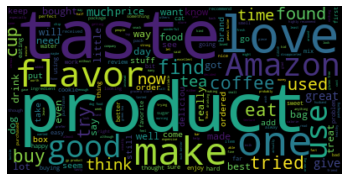

In [323]:
reviews.info()
stopwords = set(STOPWORDS) #can also use set(ntlk.corpus.stopwords('english'))
#print(stopwords)
stopwords.update(["br", "href"]) #br and href are added as stopwords. 
#print(stopwords)
textt = " ".join(review for review in reviews.Text) # this is basically joining the text from every record and creating one huge corpus
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("wordcloud1.png")
plt.show()

In [324]:
#from nltk.stem import PorterStemmer
#from nltk.tokenize import word_tokenize
#ps = PorterStemmer()
name = reviews.iloc[0:3]
punc = '''!()-[]{};:'"\, <>./?@#$%^&*_~'''      
texttt = " ".join(review for review in name.Text)
for ele in texttt:  
    if ele in punc:  
        texttt = texttt.replace(ele, " ")
print(texttt)

#words = word_tokenize(texttt)
#for item in words[:]:
#    print(ps.stem(item))


# *Just testing out the porter stemmer function. This can be helpful in data preprocessing. In cases where th

I have bought several of the Vitality canned dog food products and have found them all to be of good quality  The product looks more like a stew than a processed meat and it smells better  My Labrador is finicky and she appreciates this product better than  most  Product arrived labeled as Jumbo Salted Peanuts   the peanuts were actually small sized unsalted  Not sure if this was an error or if the vendor intended to represent the product as  Jumbo   This is a confection that has been around a few centuries   It is a light  pillowy citrus gelatin with nuts   in this case Filberts  And it is cut into tiny squares and then liberally coated with powdered sugar   And it is a tiny mouthful of heaven   Not too chewy  and very flavorful   I highly recommend this yummy treat   If you are familiar with the story of C S  Lewis   The Lion  The Witch  and The Wardrobe    this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch 


Let us now classify the ratings as positive or negative. we can classify all ratings > 3 as positive denoted by +1 and all ratings below < 3 as negative denoted by -1. The rating 3 can be dropped as these ratings are neutral. We will just focus on positive and negative sentiment detection in this exercise. 

In [325]:
import numpy as np
reviews.drop(reviews[reviews['Score'] == 3].index, inplace = True) 
reviews.head(50)

Id   ProductId          UserId                      ProfileName  \
0    1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1    2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2    3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3    4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4    5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
5    6  B006K2ZZ7K   ADT0SRK1MGOEU                   Twoapennything   
6    7  B006K2ZZ7K  A1SP2KVKFXXRU1                David C. Sullivan   
7    8  B006K2ZZ7K  A3JRGQVEQN31IQ               Pamela G. Williams   
8    9  B000E7L2R4  A1MZYO9TZK0BBI                         R. James   
9   10  B00171APVA  A21BT40VZCCYT4                    Carol A. Reed   
10  11  B0001PB9FE  A3HDKO7OW0QNK4                     Canadian Fan   
11  12  B0009XLVG0  A2725IB4YY9JEB           A Poeng "SparkyGoHome"   
12  13  B0009XLVG0   A327PCT23YH90                               LT   
13  14  B001GVISJM  A18ECVX2RJ7HUE                  willie "roadie"   
14  15  B001GVISJM  A2MUGFV2TDQ47K              Lynrie "Oh HELL no"   
15  16  B001GVISJM  A1CZX3CP8IKQIJ                     Brian A. Lee   
16  17  B001GVISJM  A3KLWF6WQ5BNYO                   Erica Neathery   
17  18  B001GVISJM   AFKW14U97Z6QO                            Becca   
18  19  B001GVISJM  A2A9X58G2GTBLP                          Wolfee1   
19  20  B001GVISJM  A3IV7CL2C13K2U                             Greg   
20  21  B001GVISJM  A1WO0KGLPR5PV6                         mom2emma   
21  22  B001GVISJM   AZOF9E17RGZH8                   Tammy Anderson   
22  23  B001GVISJM   ARYVQL4N737A1                    Charles Brown   
23  24  B001GVISJM   AJ613OLZZUG7V                           Mare's   
24  25  B001GVISJM  A22P2J09NJ9HKE      S. Cabanaugh "jilly pepper"   
25  26  B001GVISJM  A3FONPR03H3PJS     Deborah S. Linzer "Cat Lady"   
26  27  B001GVISJM  A3RXAU2N8KV45G                           lady21   
27  28  B001GVISJM   AAAS38B98HMIK                     Heather Dube   
28  29  B00144C10S  A2F4LZVGFLD1OB                           DaisyH   
29  30  B0001PB9FY  A3HDKO7OW0QNK4                     Canadian Fan   
30  31  B003F6UO7K   AFM0O9480F04W                          Sherril   
31  32  B003F6UO7K  A31OQO709M20Y7          Molly V. Smith "staral"   
32  33  B001EO5QW8   AOVROBZ8BNTP7                        S. Potter   
33  34  B001EO5QW8  A3PMM0NFVEJGK9         Megan "Bad at Nicknames"   
34  35  B001EO5QW8  A2EB6OGOWCRU5H                       CorbyJames   
35  36  B001EO5QW8  A2CI0RLADCRKPF                       T. J. Ryan   
36  37  B001EO5QW8  A1MYS9LFFBIYKM         Abby Chase "gluten free"   
37  38  B001EO5QW8  A3MGP2E1ZZ6GRB             Zardoz "focuspuller"   
38  39  B001EO5QW8  A2GHZ2UTV2B0CD                      JERRY REITH   
39  40  B001EO5QW8   AO80AC8313NIZ                        kYpondman   
40  41  B001EO5QW8   AQCY5KRO7489S                          Garrett   
41  42  B001EO5QW8  A1WK4ALVZDYPUE         Dick Baldwin "christobe"   
42  43  B001EO5QW8  A16XFOYQSJREL7                   Roger Pugliese   
43  44  B001EO5QW8  A17DW6SUOC70DJ                      Mother of 9   
44  45  B001EO5QW8  A2G7B7FKP2O2PU                       D. Leschke   
46  47  B001EO5QW8   AQLL2R1PPR46X                    grumpyrainbow   
48  49  B001EO5QW8   ALOR97KTZTK1P                     knitty pants   
50  51  B001EO5QW8  A108P30XVUFKXY                        Roberto A   
51  52  B000G6RPMY  A3S5KJDA6ED2PS                       Mike Kaser   
52  53  B000G6RPMY   A9L6L5H9BPEBO                  Edwin C. Pauzer   

    HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                      1                       1      5  1303862400   
1                      0                       0      1  1346976000   
2                      1                       1      4  1219017600   
3                      3                       3      2  1307923200   
4                      0   

In [326]:
reviews['Sentiment'] = np.where(reviews['Score'] > 3, 1, -1)
reviews.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   
3         Cough Medicine  If you are looking for the secret ingredient i...   
4            Great taffy  Great taffy at a great price.  There was a wid...   

   Sentiment  
0          1  
1         -1  
2          1  
3         -1  
4          1

Now let us get all the frequently occuring stopwords from the columns where sentiment = +1 and group them as positive sentiment and when it = -1, we can group them as negative sentiments.

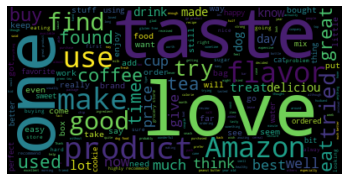

In [327]:
positive = reviews[reviews['Sentiment'] == 1]
positivetext = " ".join(review for review in positive.Text) # this is basically joining the text from every record and creating one huge corpus
positivewordcloud = WordCloud(stopwords=stopwords).generate(positivetext)
plt.imshow(positivewordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("positivewordcloud.png")
plt.show()

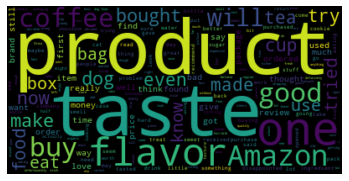

In [328]:
negative = reviews[reviews['Sentiment'] == -1]
negativetext = " ".join(review for review in negative.Text) # this is basically joining the text from every record and creating one huge corpus
negativewordcloud = WordCloud(stopwords=stopwords).generate(negativetext)
plt.imshow(negativewordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("negativewordcloud.png")
plt.show()

In [329]:
stopwordseng = set(nltk.corpus.stopwords.words('english'))


In [330]:
positive.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
5   6  B006K2ZZ7K   ADT0SRK1MGOEU                   Twoapennything   
6   7  B006K2ZZ7K  A1SP2KVKFXXRU1                David C. Sullivan   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
2                     1                       1      4  1219017600   
4                     0                       0      5  1350777600   
5                     0                       0      4  1342051200   
6                     0                       0      5  1340150400   

                                         Summary  \
0                          Good Quality Dog Food   
2                          "Delight" says it all   
4                                    Great taffy   
5                                     Nice Taffy   
6  Great!  Just as good as the expensive brands!   

                                                Text  Sentiment  
0  I have bought several of the Vitality canned d...          1  
2  This is a confection that has been around a fe...          1  
4  Great taffy at a great price.  There was a wid...          1  
5  I got a wild hair for taffy and ordered this f...          1  
6  This saltwater taffy had great flavors and was...          1

In [331]:
negative.head()

Id   ProductId          UserId     ProfileName  HelpfulnessNumerator  \
1    2  B00813GRG4  A1D87F6ZCVE5NK          dll pa                     0   
3    4  B000UA0QIQ  A395BORC6FGVXV            Karl                     3   
12  13  B0009XLVG0   A327PCT23YH90              LT                     1   
16  17  B001GVISJM  A3KLWF6WQ5BNYO  Erica Neathery                     0   
26  27  B001GVISJM  A3RXAU2N8KV45G          lady21                     0   

    HelpfulnessDenominator  Score        Time  \
1                        0      1  1346976000   
3                        3      2  1307923200   
12                       1      1  1339545600   
16                       0      2  1348099200   
26                       1      1  1332633600   

                                 Summary  \
1                      Not as Advertised   
3                         Cough Medicine   
12  My Cats Are Not Fans of the New Food   
16                            poor taste   
26                       Nasty No flavor   

                                                 Text  Sentiment  
1   Product arrived labeled as Jumbo Salted Peanut...         -1  
3   If you are looking for the secret ingredient i...         -1  
12  My cats have been happily eating Felidae Plati...         -1  
16  I love eating them and they are good for watch...         -1  
26  The candy is just red , No flavor . Just  plan...         -1

In [332]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!", '"', "(", ")"))
    return final
reviews = reviews.dropna(subset=['Summary'])
reviews['Text'] = reviews['Text'].str.lower() #converting everything to lowercase
reviews['Text'] = reviews['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwordseng)]))
reviews['Text'] = reviews['Text'].apply(remove_punctuation)
reviews['Summary'] = reviews['Summary'].str.lower() #converting everything to lowercase
reviews['Summary'] = reviews['Summary'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwordseng)]))
reviews['Summary'] = reviews['Summary'].apply(remove_punctuation)

In [333]:
print(reviews.loc[0, 'Text'])
print(reviews.loc[0, 'Summary'])

bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better most
good quality dog food


In [334]:
reviews_x = reviews[['Summary', 'Text']]
reviews_x.head()

Summary                                               Text
0  good quality dog food  bought several vitality canned dog food produc...
1             advertised  product arrived labeled jumbo salted peanutsth...
2           delight says  confection around centuries light, pillowy cit...
3         cough medicine  looking secret ingredient robitussin believe f...
4            great taffy  great taffy great price wide assortment yummy ...

In [335]:
reviews_y = reviews[['Sentiment']]
reviews_y.head(10)

Sentiment
0          1
1         -1
2          1
3         -1
4          1
5          1
6          1
7          1
8          1
9          1

In [336]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(reviews_x, reviews_y, test_size = 0.1)
train_x.head()

Summary  \
474815     nothing else works, trick   
421597                     delicious   
272351           yummy gorilla munch   
303046            horrible packaging   
457551  favorite gluten free pretzel   

                                                     Text  
474815  10 month old daughter loves peach snacks basic...  
421597  daughter gluten/casein free standard lunchbox ...  
272351  kids love really hard please love healthy must...  
303046  got package today box broken inside package de...  
457551  trying brands gluten free pretzels, favorites,...

In [337]:
test_x.head()
test_x.info()
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52022 entries, 274839 to 328698
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Summary  52022 non-null  object
 1   Text     52022 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 468193 entries, 474815 to 58981
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Summary  468193 non-null  object
 1   Text     468193 non-null  object
dtypes: object(2)
memory usage: 10.7+ MB


In [338]:
test_y.head()

Sentiment
274839         -1
86253           1
130485          1
278433          1
186522          1

In [339]:
train_y.head()

Sentiment
474815          1
421597          1
272351          1
303046         -1
457551          1

In [340]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_x_matrix = vectorizer.fit_transform(train_x['Summary'])
test_x_matrix = vectorizer.transform(test_x['Summary'])
train_x_matrix = vectorizer.fit_transform(train_x['Text'])
test_x_matrix = vectorizer.transform(test_x['Text'])


In [341]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 1000)
X_train = train_x_matrix
X_test = test_x_matrix
Y_train = train_y
Y_test = test_y

In [342]:
lr.fit(X_train, Y_train)


c:\users\vishruth\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(max_iter=1000)

In [343]:
predictions = lr.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(Y_test)
confusion_matrix(predictions,Y_test)

array([[ 6139,  1025],
       [ 1929, 42929]], dtype=int64)

In [344]:
print(classification_report(predictions,Y_test))

              precision    recall  f1-score   support

          -1       0.76      0.86      0.81      7164
           1       0.98      0.96      0.97     44858

    accuracy                           0.94     52022
   macro avg       0.87      0.91      0.89     52022
weighted avg       0.95      0.94      0.94     52022

